In [4]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import os,sys
import fnmatch
import matplotlib

In [5]:
def file_read(file_path,min_value,max_value):
    name_list=os.listdir(file_path)
    domain = os.path.abspath(file_path) #获取文件夹的路径
    memory_mean={}

    for name in name_list:#文件读取

        if fnmatch.fnmatch (name,"*_*_*_*_*_*.csv"): #只读取指定格式的文件
            info = os.path.join(domain,name) #将路径与文件名结合起来就是每个文件的完整路径
            data = pd.read_csv(info)
            #数据处理
            
            dat=data[(data['x']>=min_value)&(data['x']<=max_value)] #按照条件删选data中的值，将符合条件的放置到dat中
            m=dat["y"].mean() #对dat中y列取平均值，并将平均值保存到变量m中
            memory_mean[name]=m #将m的数值放入到字典中，索引设置为文件名name

    #data['name'].str.split('|',expand=True)
    #df=pd.DataFrame([memory_mean])
    df = pd.DataFrame(pd.Series(memory_mean),columns=['value']) #将字典格式的memory_mean转换为dataframe格式，并命名数值一列为‘value’
    df = df.reset_index().rename(columns={'index':'name'}) #将‘index’命名Wie‘name’
    sdf=df['name'].str.split('_',expand=True) #将'name'列以‘_’进行拆分，并存入sdf中
    sdf.columns=['Vg','type','time','I_pst','L','L_value'] #
    #sdf = sdf.reset_index().rename(columns={['Vg','type','time','I_pst','L','L_value']})
    #print(sdf)
    #print(df)
    sheet=pd.concat([df,sdf],axis=1)
    #print(sheet)
    #pd.DataFrame(df).to_csv( '00mean.csv')
    
    return(sheet)
  

In [6]:
#自定义输入变量

in_path='/home//wangjiaxin//Desktop//DATA//SOI_2D_B_y'
#in_path='D:\\WANG\\TCAD_2017_Share\\x_ch'
#in_path='D:\\WANG\\TCAD_2017_Share\\3D_Output'
#in_path='D:\\WANG\\TCAD_2017_Share\\Output'
#in_path='C:\\Users\\Administrator\\Desktop\\output'
min_value=15e-9
max_value=80e-9
sheet=file_read(in_path,min_value,max_value)

In [7]:
id_sheet=sheet[(sheet['type']=='id')]
id_sheet = id_sheet.reset_index().rename(columns={'value':'id_value'})
id=id_sheet[['id_value', 'Vg', 'I_pst']]
vd_sheet=sheet[(sheet['type']=='vd')]
vd_sheet = vd_sheet.reset_index().rename(columns={'value':'vd_value'})
vd=vd_sheet[['vd_value', 'Vg', 'I_pst']]

i_vd = pd.merge(id, vd, how='outer', on=['Vg','I_pst'])
i_vd=i_vd.apply(pd.to_numeric, errors='ignore')

i_v=i_vd.sort_values(by='I_pst')

In [8]:
#自定义输出路径与名字
out_path='XXX'
out_name='XXX'
pd.DataFrame(i_v).to_csv( out_path+out_name+'.csv')

Text(0.5, 1.0, 'XXXX')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


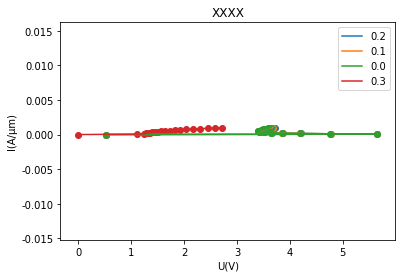

In [9]:
import matplotlib.pyplot as plt
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

aa=i_v['Vg'].drop_duplicates().values.tolist()
for vg in aa:
    x=i_v[(i_v['Vg']==vg)]['vd_value']
    y=i_v[(i_v['Vg']==vg)]['id_value']
    plt.scatter(x,y) #如果要自己定义颜色，括号里添加如 ，color='black'  
    plt.plot(x,y,label=vg)

plt.legend() # 显示图例
plt.ylabel('I(A/μm)')
plt.xlabel('U(V)')
plt.title("XXXX") #加个标题

In [10]:
plt.savefig('XXXX.png',dpi=300) #可以自己设置分辨率，图片格式直接命名就好，像.png

<Figure size 432x288 with 0 Axes>

In [14]:
from bokeh.plotting import figure, output_file, show,Column,Row
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10

Color=Category10
#p = figure(plot_width=800, plot_height=600)
aa=i_v['Vg'].drop_duplicates().values.tolist()
names=locals()
p=figure(plot_width=800, plot_height=600) #这里的图高度宽度可以自己改
mp=figure()
for vg in aa:
    names['p' + str(vg) ] = figure(plot_width=800, plot_height=600) #这个是那几个分图，高度宽度可以自己改
    x=i_v[(i_v['Vg']==vg)]['vd_value']
    y=i_v[(i_v['Vg']==vg)]['id_value']
    print([int((vg-300)/25)])
    p.line(x, y,  line_width=2, legend=str(vg),color=Color[int((vg-300)/25)])# #线条长度与大小可以自己改，下同
   
    p.circle(x, y,  size=6,legend=str(vg),color=Color[int((vg-300)/25)])#
    names['p' + str(vg) ] .circle(x, y,  size=6,legend=str(vg),color=Color[int((vg-300)/25)])#color=Color[vg]
    names['p' + str(vg) ] .line(x, y, line_width=2,legend=str(vg),color=Color[int((vg-300)/25)])#
    mp=Row(names['p' + str(vg) ],mp)
mp=Column(p,mp)
show(mp)

[-11]


KeyError: -11

In [20]:
#需要保存文件的话，自己可以改名字加路径，默认原来的csv保存路径与名字啦
output_file(out_path+out_name+".html")

In [21]:
#输出为svg
from bokeh.io import export_svgs
p.output_backend="svg"    #只能输出单个图，mp是全部拼起来的图，所以不行，p是几条线放在一起的图，p0是VG=0的图，以此类推，要哪个图自己改
export_svgs(p,out_path+out_name+".svg") #换其他的图改p

RuntimeError: To use bokeh.io image export functions you need selenium ("conda install -c bokeh selenium" or "pip install selenium")

In [22]:
#输出为png
from bokeh.io import export_png
export_png(mp, out_path+out_name+".png") #可以输出拼起来的图，如mp

RuntimeError: To use bokeh.io image export functions you need selenium ("conda install -c bokeh selenium" or "pip install selenium")